__Xiangyi Cheng (xxc283)__


# Concepts


This notebook is for blurring an image using a Gaussian kernel. Gaussian kernel and convolution are two key points exist in Gaussian filter. A kernel is a square matrix of pixels where the pixel values correspond to the values of a 2D Gaussian curve. Then convolution should be done between image and the kernel. Specifically, each pixel in the image gets multiplied by the value of the Gaussian kernel in the coresponding position. The result value replaces the center pixel of the image where the kernel overlaps. After all the calculation is done, the whole process of Gaussian filter finishes.

# Implement

To convert the concept into practical code, OpenCV, numpy, matplotlib and IPython.display libraries are used in this code.

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display,Math,Latex

I have three verisions of Gaussian blurring filter. The simplest one is to blur a black and white image without corners blurred. 
Load the image from the folder as a black and white image so that each pixel only owns one value which reveals its intensity. The dimension of the image is obtained by img.shape.  

In [9]:
img=cv2.imread('eecs531-xxc283/A1/sydney.jpg',cv2.IMREAD_GRAYSCALE)
img1=cv2.imwrite('eecs531-xxc283/A1/gray_sydney.jpg',img)
img_blurred=img.copy()
# get the height and width of the image.
h,w=img.shape[:2]

A 5x5 approximated Gaussian filter is input as the kernel (shown below). The matrix is generated by a column matrix times a row matrix due to symmetry.

Gaussian kernal=$1/256*\begin{pmatrix}
1 & 4 & 6 & 4 & 1\\
4 & 16 & 24 & 16 & 4\\
6 & 24 & 36 & 24 & 6\\
4 & 16 & 24 & 16 & 4\\
1 & 4 & 6 & 4 & 1
\end{pmatrix}$

In [10]:
# create a Gaussian matrix.
Gaussian=1/256.*np.matrix('1;4;6;4;1')*np.matrix('1 4 6 4 1')

Calculate the iteration numbers for height and width of original image respectively.

In [11]:
h_iteration=h-len(Gaussian)+1
w_iteration=w-len(Gaussian)+1

Get the value of each pixel from the original image and kernel. Then do the convolution in each iternation based on these values. Give the final value to the pixel on corresponding position of the blurred image. The convolustion is seen as:$$\int_{-\infty}^{\infty} f(x)*g(t-x) dx$$

In [12]:
for i in range(0,h_iteration):
	for j in range(0,w_iteration):
		sum=0
		for h1 in range(0,len(Gaussian)):
			for w1 in range(0,len(Gaussian)):
				# get the value of the pixel from the image and kernel.
				pixel_bg=img.item(i+w1,j+h1)
				pixel_kernel=Gaussian[w1,h1]
				# do the convolution.
				sum=sum+(pixel_bg*pixel_kernel) 
		# give the final value to the pixel on the processed image. 
		img_blurred.itemset((i+2,j+2),sum)

Save the blurred image into the folder.

In [13]:
cv2.imwrite('eecs531-xxc283/A1/img_blurred.jpg',img_blurred)

True

Show the original image and blurred image.

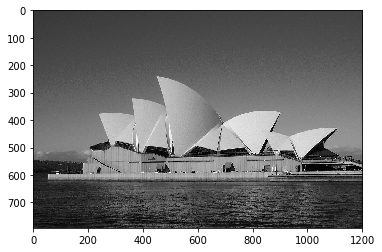

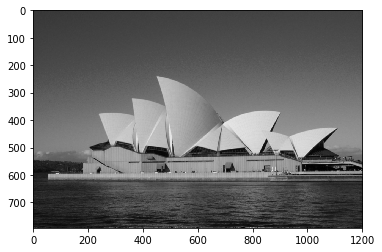

In [14]:
image=cv2.imread('eecs531-xxc283/A1/img_blurred.jpg')
img=cv2.imread('eecs531-xxc283/A1/gray_sydney.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
plt.imshow(image)
plt.show()

The second version is to blur an black and white image with its corners. So the function is inclusive for the whole image other than a part of it.

Read the image and input the Gaussian matrix.

In [15]:
img=cv2.imread('eecs531-xxc283/A1/sydney.jpg',cv2.IMREAD_GRAYSCALE)
img_blurred=img.copy()
h,w=img.shape[:2]

Gaussian=1/256.*np.matrix('1;4;6;4;1')*np.matrix('1 4 6 4 1')
center_poc=(len(Gaussian)-1)/2

Add two rows above and below the image respectively. And add two colums on left and right sides of the image. In this way, we reshape a zero matrix in (h+2,w+2) dimension.

In [16]:
img_reshape=np.zeros((h+2*center_poc,w+2*center_poc))

Use a for loop to give the original pixel values from the original image to the corresponding position of the new matrix.

In [17]:
for k in range(0,h):
	for l in range(0,w):
		img_reshape[k+center_poc,l+center_poc]=img_blurred.item(k,l)

The convolustion is done as the same as the first approach.

In [18]:
for i in range(0,h):
	for j in range(0,w):
		sum=0
		for h1 in range(0,len(Gaussian)):
			for w1 in range(0,len(Gaussian)):
				pixel_bg=img_reshape.item(i+h1,j+w1)
				pixel_kernel=Gaussian[h1,w1]
				sum=sum+(pixel_bg*pixel_kernel) 
		img_blurred.itemset((i,j),sum)

cv2.imwrite('eecs531-xxc283/A1/sydney_blurred_modified.jpg',img_blurred)

True

Show the orignal image and blurred image.

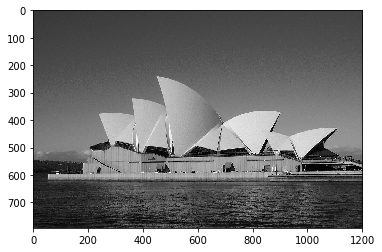

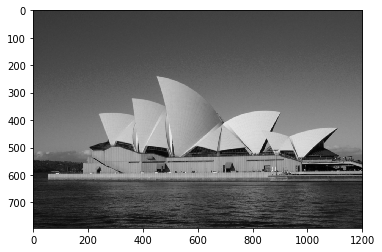

In [19]:
image=cv2.imread('eecs531-xxc283/A1/sydney_blurred_modified.jpg')
img=cv2.imread('eecs531-xxc283/A1/gray_sydney.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
plt.imshow(image)
plt.show()

The third version is modified based on previous two approaches. A color channel is added to get a colorful image blurred.

Read the image with cv2.IMREAD_COLOR to get an colorful image with RBG channel.

In [20]:
img=cv2.imread('eecs531-xxc283/A1/sydney.jpg',cv2.IMREAD_COLOR)
img_blurred=img.copy()
h,w=img.shape[:2]

Input the same Gaussian filter. But a 3D matrix is created to generate a new blurred image with color.

In [21]:
Gaussian=1/256.*np.matrix('1;4;6;4;1')*np.matrix('1 4 6 4 1')
center_poc=(len(Gaussian)-1)/2

# create a 3D zero matrix with height, weight, color channel.
img_reshape=np.zeros((h+2*center_poc,w+2*center_poc,3))

Give the original pixel values from the original image to the corresponding position of the new matrix with color channel.

In [22]:
for k in range(0,h):
	for l in range(0,w):
		for d in range(0,3): # 0--R, 1--G, 2--B in color channel.
			img_reshape[k+center_poc,l+center_poc,d]=img_blurred.item(k,l,d)

Then convolution is done as the same as previous two except a color channel is added. So we have one more loop for the color.

In [23]:
for c in range(0,3): # 0--R, 1--G, 2--B in color channel.
	for i in range(0,h):
		for j in range(0,w):
			sum=0
			for h1 in range(0,len(Gaussian)):
				for w1 in range(0,len(Gaussian)):
					pixel_bg=img_reshape.item(i+h1,j+w1,c)
					pixel_kernel=Gaussian[h1,w1]
					sum=sum+(pixel_bg*pixel_kernel) 
			img_blurred.itemset((i,j,c),sum)
cv2.imwrite('eecs531-xxc283/A1/sydney_blurred_colored.jpg',img_blurred)

True

Show the original image with full color and blurred image.

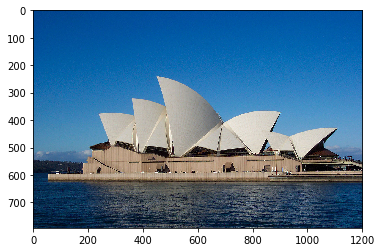

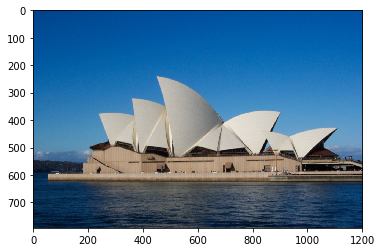

In [24]:
image=cv2.imread('eecs531-xxc283/A1/sydney_blurred_colored.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
plt.imshow(image)
plt.show()

# Conclusion and Analysis
In conclusion, three versions of Gaussian filter are developed, black and white image blurring without corners, black and white image blurring with corners, color image blurring with corners. These versions exactly show my work steps and detail editing process that I started from a gray scale image partial blurring to a color image with full blurring. The limit of my algorithm compared to the mature packaged one is that the computational time of mine is definitely larger so that it will consume more on CPU. But I proved the concepts behind the Gaussian blurring perferctly.